## Oasis Infobyte : Data Science Internship

## Task 4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

### Name of Intern : K.Sri Sai Sravya

### Batch : February Phase 2 OIBSIP

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

### Explore the dataset

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


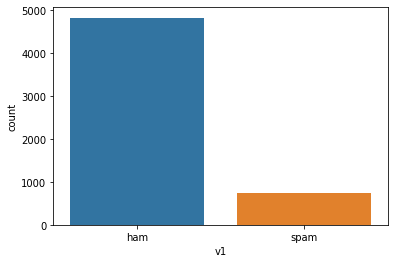

In [6]:
sns.countplot(data['v1'])
plt.show()

In [7]:
data['length'] = data['v2'].apply(len)
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  length  
0        NaN        NaN     111  
1        NaN        NaN      29  
2        NaN        NaN     155  
3        NaN        NaN      49  
4        NaN        NaN      61  


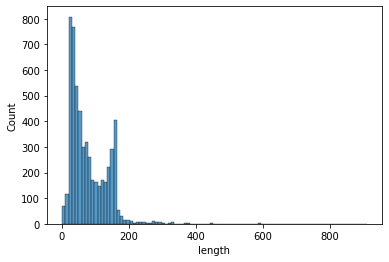

In [8]:
sns.histplot(data['length'])
plt.show()

In [9]:
data = data[['v1', 'v2']]
data = data.rename(columns={'v1': 'label', 'v2': 'text'})

### Data Preprocessing

In [10]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [11]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def tokenize(text):
    tokens = word_tokenize(text)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(token.lower()) for token in tokens if token.isalpha()]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


In [12]:
count_vect = CountVectorizer(tokenizer=tokenize, stop_words='english')
tfidf_transformer = TfidfTransformer()

### Split the data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [14]:
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


### Training the model

In [15]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### Testing the model

In [16]:
y_pred = clf.predict(X_test_tfidf)

In [17]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Evaluating the model

In [18]:
print(confusion_matrix(y_test, y_pred))

[[965   0]
 [ 44 106]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

